# Simple CNN

In [1]:
%matplotlib inline


from sklearn.decomposition import PCA
import keras
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, concatenate, Input

import sklearn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing

#Imports
import pandas as pd
import numpy as np
from keras import layers
from keras.utils import to_categorical


#Splitting data
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split




import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

##### 1) Loading Data

In [2]:
import os
files_train = []
for i in os.listdir("zigzag/trainResampled"):
    files_train.append(["zigzag/trainResampled/"+i, "zigzag"])
    
    
# for i in os.listdir("speedbumppassing/train"):
#     files_train.append(["speedbumppassing/train/"+i, "speedbump"])
    
for i in os.listdir("sharpturnsResampled/train"):
    files_train.append(["sharpturnsResampled/train/"+i, "sharpturn"])
    
for i in os.listdir("suddenbrakingResampled/train"):
    files_train.append(["suddenbrakingResampled/train/"+i, "suddenbraking"])
    
    
for i in os.listdir("potholes/trainResampled"):
    files_train.append(["potholes/trainResampled/"+i, "pothole"])

In [3]:
import os
files_test = []
for i in os.listdir("zigzag/testResampled"):
    files_test.append(["zigzag/testResampled/"+i, "zigzag"])
    
    
# for i in os.listdir("speedbumppassing/test"):
#     files_test.append(["speedbumppassing/test/"+i, "speedbump"])

for i in os.listdir("sharpturnsResampled/test"):
    files_test.append(["sharpturnsResampled/test/"+i, "sharpturn"])
    
for i in os.listdir("suddenbrakingResampled/test"):
    files_test.append(["suddenbrakingResampled/test/"+i, "suddenbraking"])
    
for i in os.listdir("potholes/testResampled"):
    files_test.append(["potholes/testResampled/"+i, "pothole"])

In [4]:
import pathlib
import csv

import numpy as np


def csv2numpy(file_name):
    """Read multidimensional signal from file"""
    # Read data from file.
    data = np.genfromtxt(file_name, delimiter=",", skip_header=1)
    # Return all columns but the first one (as it is the index).
    return data[:, 1:]



def get_crops(files, length, discard_start, discard_end, padding_mode=None):
        """Return list with crops from files."""
        crops = []
        # Iterate over data files.
        for file, class_ in files:
            # Read from file.
            signal = csv2numpy(file)
            # Crop start and end.
            signal = signal[discard_start:(signal.shape[0] - discard_end)]
            windows, remainder = divmod(signal.shape[0], length)
            if padding_mode and remainder != 0:
                # Apply padding with given padding mode.
                padding = length * (windows + 1) - signal.shape[0]
                signal = np.pad(signal, ((0, padding), (0, 0)), padding_mode)
            elif padding_mode is None:
                # Crop the end.
                signal = signal[:(length * windows)]
            # Obtain crops from <discard_start> to <discard-end>.
            for i in range(0, signal.shape[0], length):
                crop = signal[i:(i + length)]
                crops.append([crop, class_])

        return crops

In [5]:
crops_train = get_crops(files_train, 500, 50, 50)
crops_test = get_crops(files_test, 500, 50, 50)

In [6]:
label_encoder = sklearn.preprocessing.LabelEncoder()
label_encoder.fit(["zigzag", "sharpturn","suddenbraking",  "pothole"]);

In [7]:
X_train = []
y_train = []
for i in crops_train:
    X_train.append(i[0])
    y_train.append(i[1])

In [8]:
X_test = []
y_test = []
for i in crops_test:
    X_test.append(i[0])
    y_test.append(i[1])

In [67]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [68]:
y_train = to_categorical(label_encoder.transform(y_train))
y_test = to_categorical(label_encoder.transform(y_test))

In [9]:
from collections import Counter
counter = Counter(y_train)

# Print the results
print(counter)


Counter({'zigzag': 753, 'sharpturn': 81, 'suddenbraking': 61, 'pothole': 41})


In [10]:
from collections import Counter
counter = Counter(y_test)

# Print the results
print(counter)


Counter({'zigzag': 63, 'suddenbraking': 13, 'pothole': 6, 'sharpturn': 3})


In [79]:
X_test.shape

(85, 500, 6)

##### 3) Model Architecture

In [71]:
clf = Sequential()
#add model layers
clf.add(Conv1D(16, kernel_size=5, activation="relu", input_shape=(500, 6)))
clf.add(Conv1D(32, kernel_size=5, activation="relu"))

clf.add(Flatten())
clf.add(Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(0.01)))
clf.add(Dense(4, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01)))

In [72]:
clf.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [73]:
clf.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 496, 16)           496       
                                                                 
 conv1d_9 (Conv1D)           (None, 492, 32)           2592      
                                                                 
 flatten_4 (Flatten)         (None, 15744)             0         
                                                                 
 dense_8 (Dense)             (None, 16)                251920    
                                                                 
 dense_9 (Dense)             (None, 4)                 68        
                                                                 
Total params: 255076 (996.39 KB)
Trainable params: 255076 (996.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##### 4) Training the model

In [74]:
history=clf.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30)
history

Epoch 1/30
30/30 [==============================] - 2s 21ms/step - loss: 0.9573 - accuracy: 0.8365 - val_loss: 0.7255 - val_accuracy: 0.8471
Epoch 2/30
30/30 [==============================] - 0s 14ms/step - loss: 0.4895 - accuracy: 0.9177 - val_loss: 0.5232 - val_accuracy: 0.8941
Epoch 3/30
30/30 [==============================] - 0s 15ms/step - loss: 0.3284 - accuracy: 0.9551 - val_loss: 0.3456 - val_accuracy: 0.9647
Epoch 4/30
30/30 [==============================] - 1s 20ms/step - loss: 0.2458 - accuracy: 0.9797 - val_loss: 0.2831 - val_accuracy: 0.9765
Epoch 5/30
30/30 [==============================] - 0s 14ms/step - loss: 0.1937 - accuracy: 0.9882 - val_loss: 0.2278 - val_accuracy: 0.9882
Epoch 6/30
30/30 [==============================] - 0s 15ms/step - loss: 0.1619 - accuracy: 0.9915 - val_loss: 0.2049 - val_accuracy: 0.9882
Epoch 7/30
30/30 [==============================] - 0s 15ms/step - loss: 0.1380 - accuracy: 0.9979 - val_loss: 0.2179 - val_accuracy: 0.9647
Epoch 8/30
30

##### 5) Finding Training and Testing Accuracy

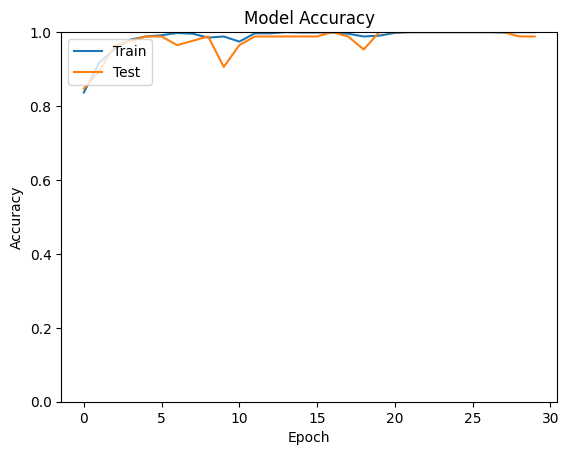

In [75]:
# Plot the training and testing accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim([0, 1])
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [76]:
test_loss,test_acc=clf.evaluate(X_test, y_test)
test_loss,test_acc

3/3 [==============================] - 0s 5ms/step - loss: 0.0947 - accuracy: 0.9882


(0.09468407183885574, 0.9882352948188782)

##### 6) Compute and plot the confusion matrix for the three classes

In [77]:
predictions=clf.predict(X_test)
class_labels = ["zigzag", "sharpturn","suddenbraking",  "pothole"]
predicted_class_labels = [class_labels[np.argmax(pred)] for pred in predictions]
actual_class_labels=[class_labels[np.argmax(actual)] for actual in y_test]
print(classification_report(actual_class_labels, predicted_class_labels))

3/3 [==============================] - 0s 3ms/step
               precision    recall  f1-score   support

      pothole       0.98      1.00      0.99        63
    sharpturn       1.00      1.00      1.00         3
suddenbraking       1.00      1.00      1.00        13
       zigzag       1.00      0.83      0.91         6

     accuracy                           0.99        85
    macro avg       1.00      0.96      0.98        85
 weighted avg       0.99      0.99      0.99        85



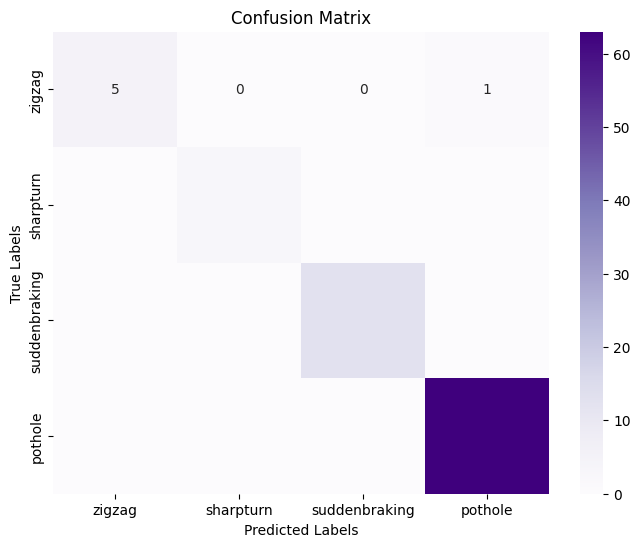

In [78]:
conf_matrix = confusion_matrix(actual_class_labels, predicted_class_labels, labels=class_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

##### 7) Saving the final results in Excel sheet

In [43]:
precision_per_class = precision_score(actual_class_labels, predicted_class_labels, average=None)
recall_per_class = recall_score(actual_class_labels, predicted_class_labels, average=None)

print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)

Precision per class: [0.93382353 0.95652174 0.8556231 ]
Recall per class: [1.         0.17460317 0.99822695]


In [44]:
f1_micro = f1_score(actual_class_labels, predicted_class_labels, average='micro')
f1_macro = f1_score(actual_class_labels, predicted_class_labels, average='macro')

print("Micro F1 Score:", f1_micro)
print("Macro F1 Score:", f1_macro)

Micro F1 Score: 0.8714810281517748
Macro F1 Score: 0.727507247656407


In [23]:
data={'SimpleCNN_Results':[max(history.history['accuracy']),test_acc,f1_micro,f1_macro,precision_per_class[0],precision_per_class[1],precision_per_class[2],recall_per_class[0],recall_per_class[1],recall_per_class[2]]}
result['SimpleCNN_Results']=pd.DataFrame(data,index=['Training Accuracy','Testing Accuracy','Micro F1 Score','Macro F1 Score','Precision for Negative sentiment','Precision for Positive sentiment','Precision for Neutral sentiment','Recall for Negative sentiment','Recall for Positive sentiment','Recall for Neutral sentiment'])
result['SimpleCNN_Results']

NameError: name 'result' is not defined

In [ ]:
result.to_csv('Results.csv', index=True)

In [80]:
clf.save("CNNFinalClassifier.keras")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.regularizers import l2
from time import time

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPooling1D, Flatten, LSTM, Dense
from tensorflow.keras.regularizers import l2

# Define the model with L2 regularization
model = Sequential()

# TimeDistributed(Conv1D()) layer with parameters and L2 regularization
model.add(TimeDistributed(Conv1D(filters=16, kernel_size=3, activation='relu', kernel_regularizer=l2(0.01)), input_shape=(500, 6, 1)))

# TimeDistributed(MaxPooling1D()) layer with parameters and padding
model.add(TimeDistributed(MaxPooling1D(pool_size=2, padding='same')))

# TimeDistributed(Conv1D()) layer with parameters and L2 regularization
model.add(TimeDistributed(Conv1D(filters=8, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01))))

# TimeDistributed(MaxPooling1D()) layer with parameters and padding
model.add(TimeDistributed(MaxPooling1D(pool_size=2, padding='same')))

# TimeDistributed(Conv1D()) layer with parameters and L2 regularization
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01))))

# TimeDistributed(MaxPooling1D()) layer with parameters and padding
model.add(TimeDistributed(MaxPooling1D(pool_size=2, padding='same')))

# TimeDistributed(Conv1D()) layer with parameters and L2 regularization
model.add(TimeDistributed(Conv1D(filters=8, kernel_size=3, activation='relu', padding='same', kernel_regularizer=l2(0.01))))

# TimeDistributed(MaxPooling1D()) layer with parameters and padding
model.add(TimeDistributed(MaxPooling1D(pool_size=2, padding='same')))

# TimeDistributed(Flatten()) layer
model.add(TimeDistributed(Flatten()))

# Define LSTM model with parameters and L2 regularization
model.add(LSTM(units=60, return_sequences=True, kernel_regularizer=l2(0.01)))

# Additional LSTM layer with L2 regularization
model.add(LSTM(units=70, return_sequences=True, kernel_regularizer=l2(0.01)))

# Flatten layer outside TimeDistributed
model.add(Flatten())

# Dense layer with parameters and L2 regularization
model.add(Dense(units=4, activation='softmax', kernel_regularizer=l2(0.01)))  # Adjust units to match the number of output classes

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
cnnlstmHistory = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
30/30 [==============================] - 39s 1s/step - loss: 2.1448 - accuracy: 0.8013 - val_loss: 1.9046 - val_accuracy: 0.7412
Epoch 2/30
30/30 [==============================] - 34s 1s/step - loss: 1.4367 - accuracy: 0.8045 - val_loss: 1.4075 - val_accuracy: 0.7412
Epoch 3/30
30/30 [==============================] - 37s 1s/step - loss: 1.0471 - accuracy: 0.8504 - val_loss: 1.2300 - val_accuracy: 0.7765
Epoch 4/30
30/30 [==============================] - 37s 1s/step - loss: 0.8453 - accuracy: 0.8771 - val_loss: 1.0553 - val_accuracy: 0.7765
Epoch 5/30
30/30 [==============================] - 29s 967ms/step - loss: 0.6752 - accuracy: 0.8964 - val_loss: 0.9866 - val_accuracy: 0.8235
Epoch 6/30
30/30 [==============================] - 28s 922ms/step - loss: 0.5933 - accuracy: 0.9092 - val_loss: 0.5996 - val_accuracy: 0.9294
Epoch 7/30
30/30 [==============================] - 28s 920ms/step - loss: 0.5310 - accuracy: 0.9252 - val_loss: 0.5781 - val_accuracy: 0.9294
Epoch 8/30
